In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

# Data Cleaning

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [6]:
#missing values

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insights and Observation
* Dataset has missing values - rating has 1474 missing values
* others are in single digit

In [8]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [9]:
#to check if reviews has numric values
df['Reviews'].str.isnumeric().sum()

10840

In [10]:
df[~df['Reviews'].str.isnumeric()]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [11]:
df_copy = df.copy()

In [12]:
df_copy=df_copy.drop(df_copy.index[10472])

In [13]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [14]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [15]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
df_copy['Size'] = df_copy['Size'].str.replace('M','000').str.replace('k','')

In [17]:
df_copy['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'Varies with device', '9.4000', '15000', '10000',
       '1.2000', '26000', '8.0000', '7.9000', '56000', '57000', '35000',
       '54000', '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23', '6.5000', '1.5000', '7

In [18]:
df_copy['Size'].isnull().sum()

0

In [19]:
df_copy[df_copy['Size']=='Varies with device']

App             Category  \
37                                    Floor Plan Creator       ART_AND_DESIGN   
42                            Textgram - write on photos       ART_AND_DESIGN   
52                         Used Cars and Trucks for Sale    AUTO_AND_VEHICLES   
67                                    Ulysse Speedometer    AUTO_AND_VEHICLES   
68                                                REPUVE    AUTO_AND_VEHICLES   
...                                                  ...                  ...   
10713  My Earthquake Alerts - US & Worldwide Earthquakes              WEATHER   
10725                                          Posta App  MAPS_AND_NAVIGATION   
10765                    Chat For Strangers - Video Chat               SOCIAL   
10826          Frim: get new friends on local chat rooms               SOCIAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   

       Rating  Reviews                Size     Installs  Type Price  \
37        4.1    36639  Varies with device   5,000,000+  Free     0   
42        4.4   295221  Varies with device  10,000,000+  Free     0   
52        4.6    17057  Varies with device   1,000,000+  Free     0   
67        4.3    40211  Varies with device   5,000,000+  Free     0   
68        3.9      356  Varies with device     100,000+  Free     0   
...       ...      ...                 ...          ...   ...   ...   
10713     4.4     3471  Varies with device     100,000+  Free     0   
10725     3.6        8  Varies with device       1,000+  Free     0   
10765     3.4      622  Varies with device     100,000+  Free     0   
10826     4.0    88486  Varies with device   5,000,000+  Free     0   
10839     4.5      114  Varies with device       1,000+  Free     0   

      Content Rating             Genres        Last Updated  \
37          Everyone       Art & Design       July 14, 2018   
42          Everyone       Art & Design       July 30, 2018   
52          Everyone    Auto & Vehicles       July 30, 2018   
67          Everyone    Auto & Vehicles       July 30, 2018   
68          Everyone    Auto & Vehicles        May 25, 2018   
...              ...                ...                 ...   
10713       Everyone            Weather       July 24, 2018   
10725       Everyone  Maps & Navigation  September 27, 2017   
10765     Mature 17+             Social        May 23, 2018   
10826     Mature 17+             Social      March 23, 2018   
10839     Mature 17+  Books & Reference    January 19, 2015   

              Current Ver         Android Ver  
37     Varies with device        2.3.3 and up  
42     Varies with device  Varies with device  
52     Varies with device  Varies with device  
67     Varies with device  Varies with device  
68     Varies with device  Varies with device  
...                   ...                 ...  
10713  Varies with device  Varies with device  
10725  Varies with device          4.4 and up  
10765  Varies with device  Varies with device  
10826  Varies with device  Varies with device  
10839  Varies with device  Varies with device  

[1695 rows x 13 columns]

In [20]:
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)

In [21]:
df_copy['Size'] = df_copy['Size'].astype(float)

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [23]:
df.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

  Reviews Size  Installs  Type Price Content Rating  \
0     159  19M   10,000+  Free     0       Everyone   
1     967  14M  500,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up

In [24]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [25]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [26]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [27]:
chars_to_remove=['+',',','$']
cols_to_clean = ['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [28]:
df_copy.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews     Size Installs  Type Price Content Rating  \
0      159  19000.0    10000  Free     0       Everyone   
1      967  14000.0   500000  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up

In [29]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [30]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [31]:
df_copy['Installs'] = df_copy['Installs'].astype(int)

In [32]:
df_copy['Price'] = df_copy['Price'].astype(float)

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [34]:
##handle last update feature
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [35]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [36]:
df_copy['Date'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [37]:
df_copy.info()
df_copy.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Date            10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Ye

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  Date  \
0               Art & Design   2018-01-07       1.0.0  4.0.3 and up     7   
1  Art & Design;Pretend Play   2018-01-15       2.0.0  4.0.3 and up    15   

   Month  Year  
0      1  2018  
1      1  2018

In [38]:
df_copy.to_csv('data/google_play_cleaned.csv')

# EDA

In [39]:
df_copy.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510      8.7   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967      2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

   Date  Month  Year  
0     7      1  2018  
1    15      1  2018  
2     1      8  2018  
3     8      6  2018  
4    20      6  2018

In [40]:
df_copy['App'].duplicated().sum()
df_copy[df_copy['App'].duplicated()]
df_copy.duplicated().sum()

483

## observation/Insights
There are duplicates available and needs to be removed

In [42]:
df_copy = df_copy.drop_duplicates(subset='App',keep='first')

In [45]:
df_copy.shape

(9659, 16)

# Explore Data

In [47]:
numerical_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype!='O']
categorical_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype=='O']
numerical_feature,categorical_feature

(['Rating',
  'Reviews',
  'Size',
  'Installs',
  'Price',
  'Last Updated',
  'Date',
  'Month',
  'Year'],
 ['App',
  'Category',
  'Type',
  'Content Rating',
  'Genres',
  'Current Ver',
  'Android Ver'])

In [48]:
#Feature information

In [50]:
## Proportion of count data on categorical columns
for col in categorical_feature:
    print('## ',col)
    print(df[col].value_counts(normalize=True)*100)
    print('----------------------------------------')

##  App
ROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
ESPN                                                  0.064570
Duolingo: Learn Languages Free                        0.064570
Candy Crush Saga                                      0.064570
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009224
U-Report                                              0.009224
U of I Community Credit Union                         0.009224
Waiting For U Launcher Theme                          0.009224
iHoroscope - 2018 Daily Horoscope & Astrology         0.009224
Name: App, Length: 9660, dtype: float64
----------------------------------------
##  Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONA

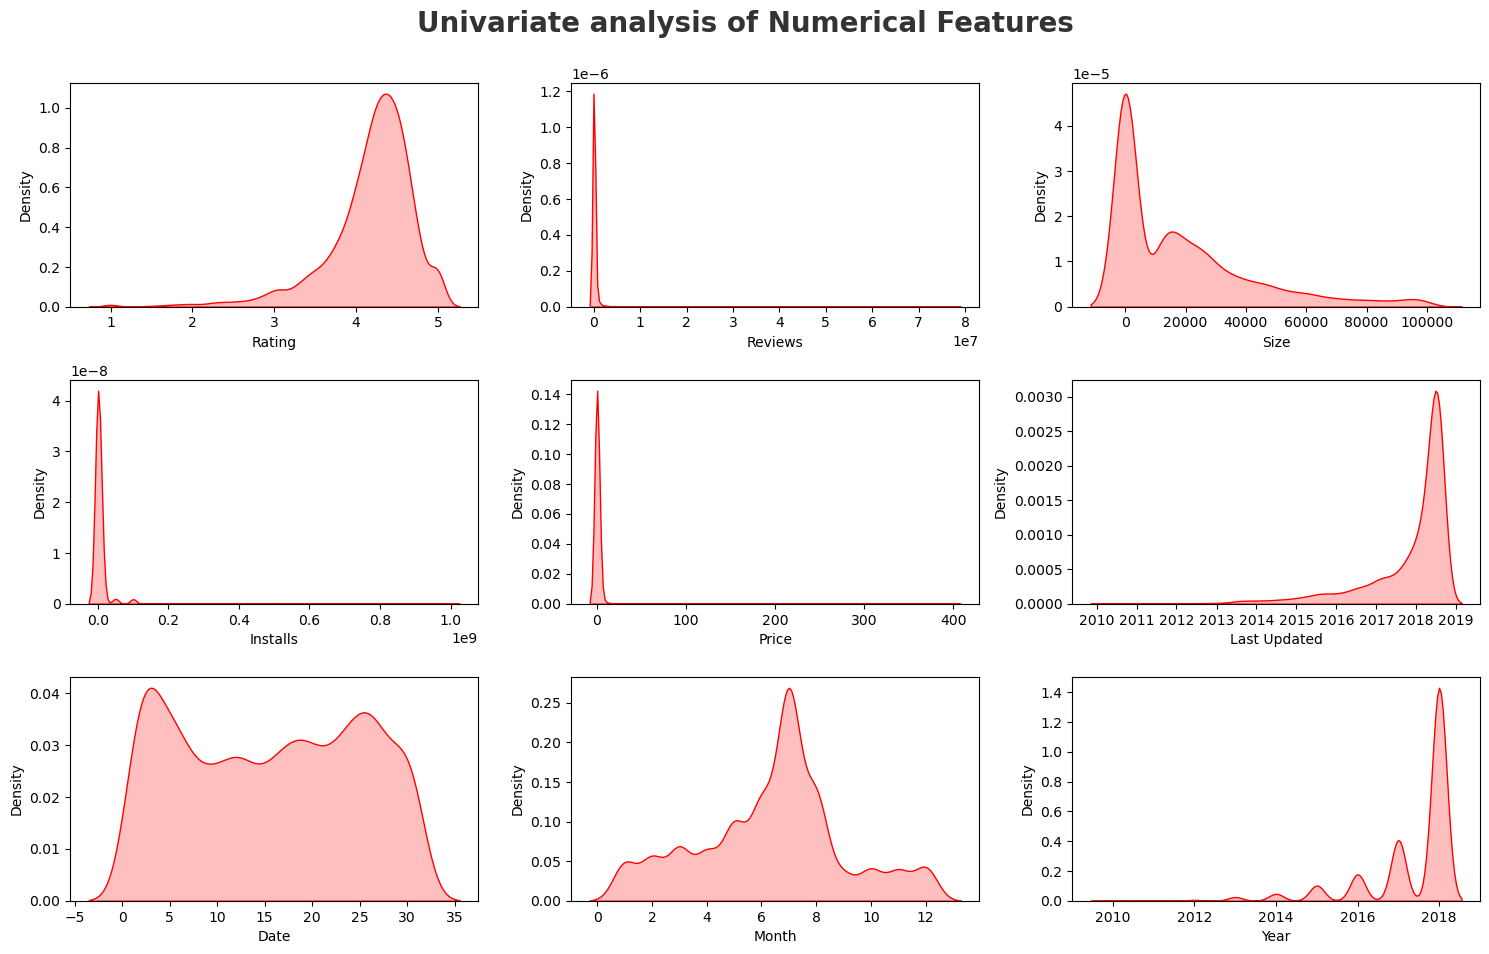

In [52]:
## Proportion of count data on numeric columns - Visualization
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numerical_feature[i]],shade=True,color='r')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

## Observation
* Rating, Last update and Year are right skewed
* Reviews, Size, Installs, Price are left skewed

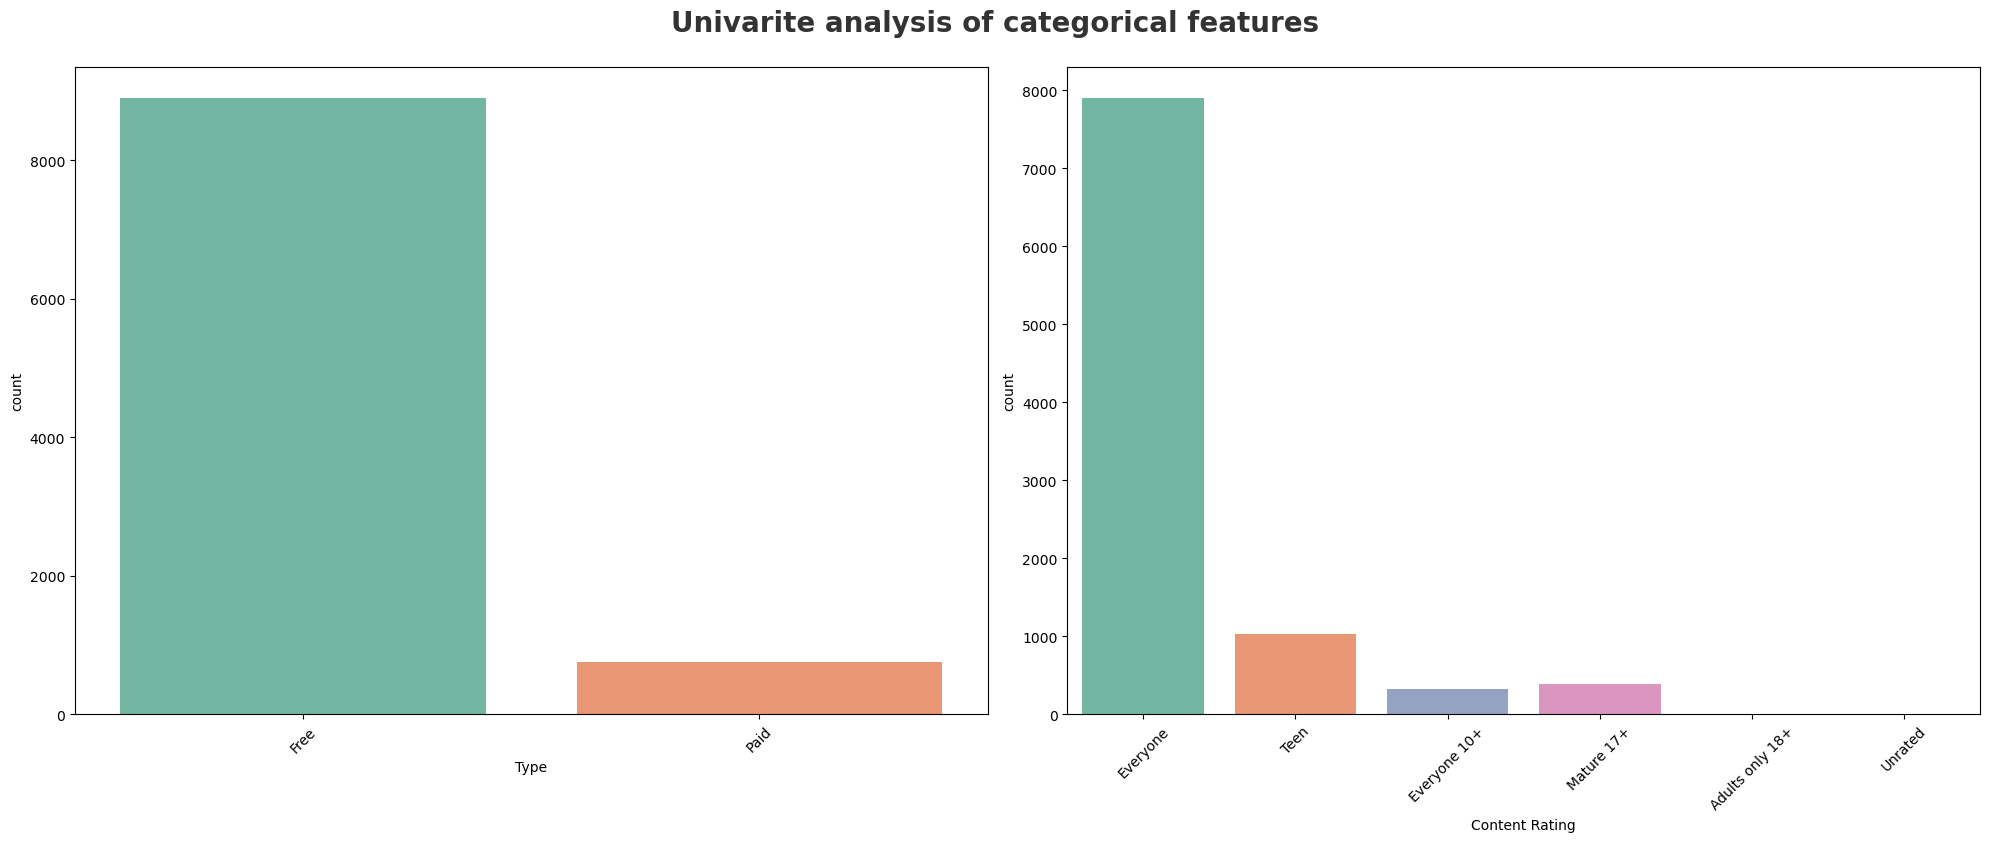

In [55]:
#categorical columns
plt.figure(figsize=(20,15))
plt.suptitle('Univarite analysis of categorical features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category = ['Type','Content Rating']
for i in range(len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df_copy[category[i]],palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

Which is the most popular app category?

In [57]:
#df_copy['Category'].unique()

<AxesSubplot: ylabel='Category'>

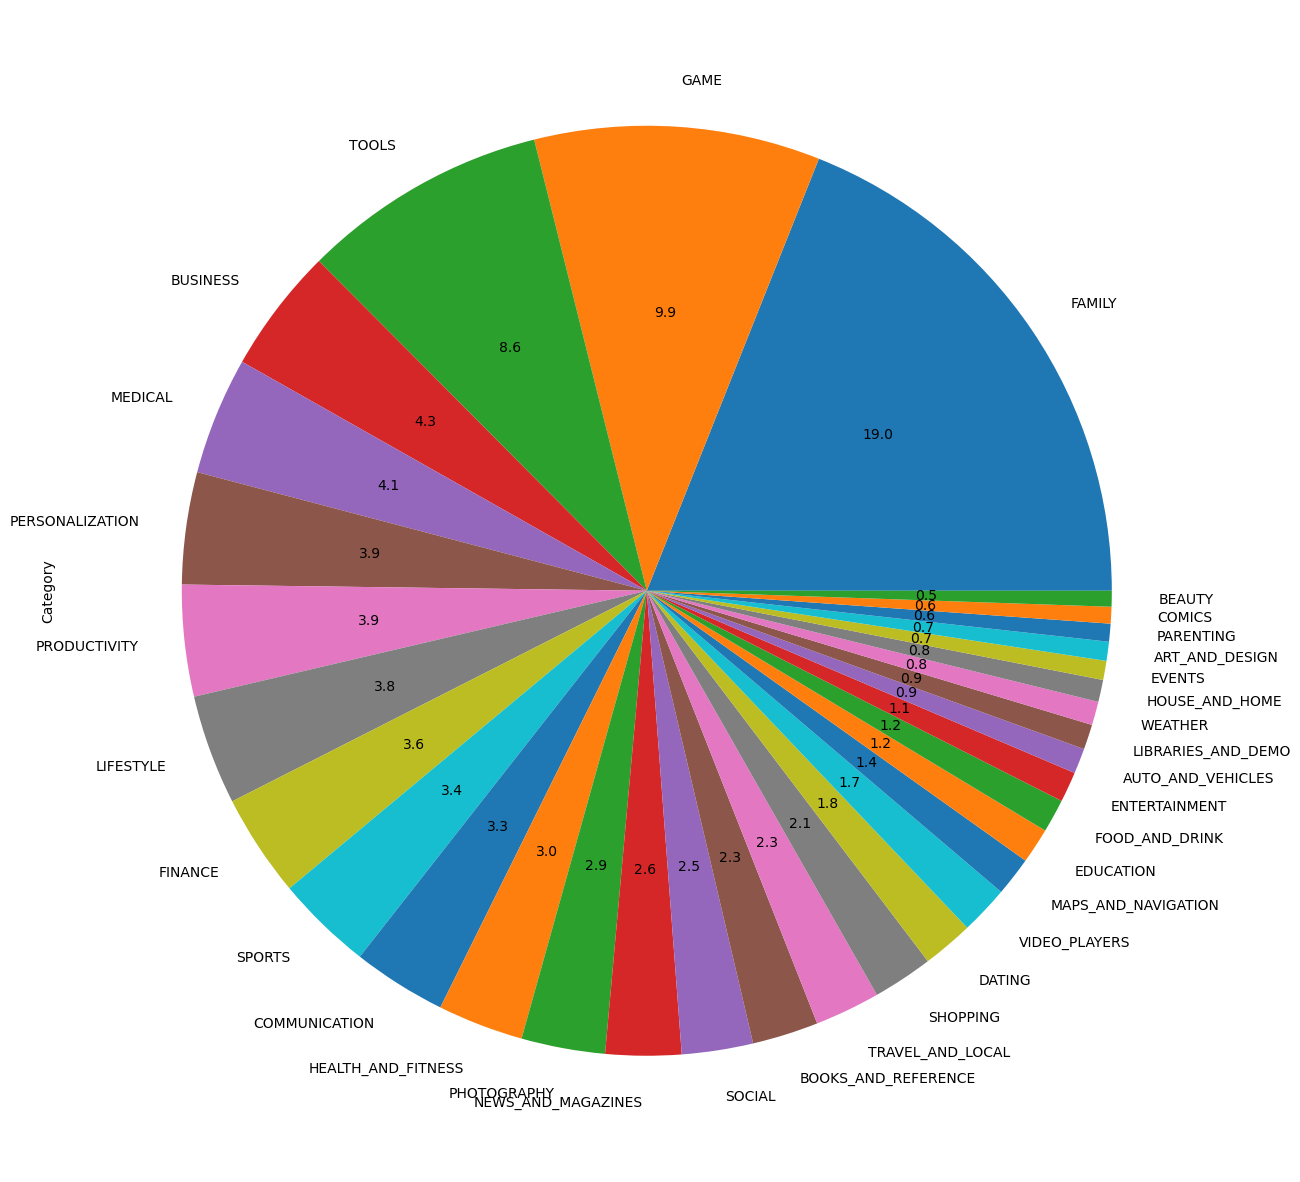

In [61]:
df_copy['Category'].value_counts().plot.pie(figsize=(15,16),autopct='%1.1f')

# Observation
* Family, Game and Tools contributes most in app category ~37.6%
* Least contributing - Beauty, comics and Parenting

In [62]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns={'Category':'Count'},inplace=True)
category.head(10)

Count
FAMILY            1832
GAME               959
TOOLS              827
BUSINESS           420
MEDICAL            395
PERSONALIZATION    376
PRODUCTIVITY       374
LIFESTYLE          369
FINANCE            345
SPORTS             325

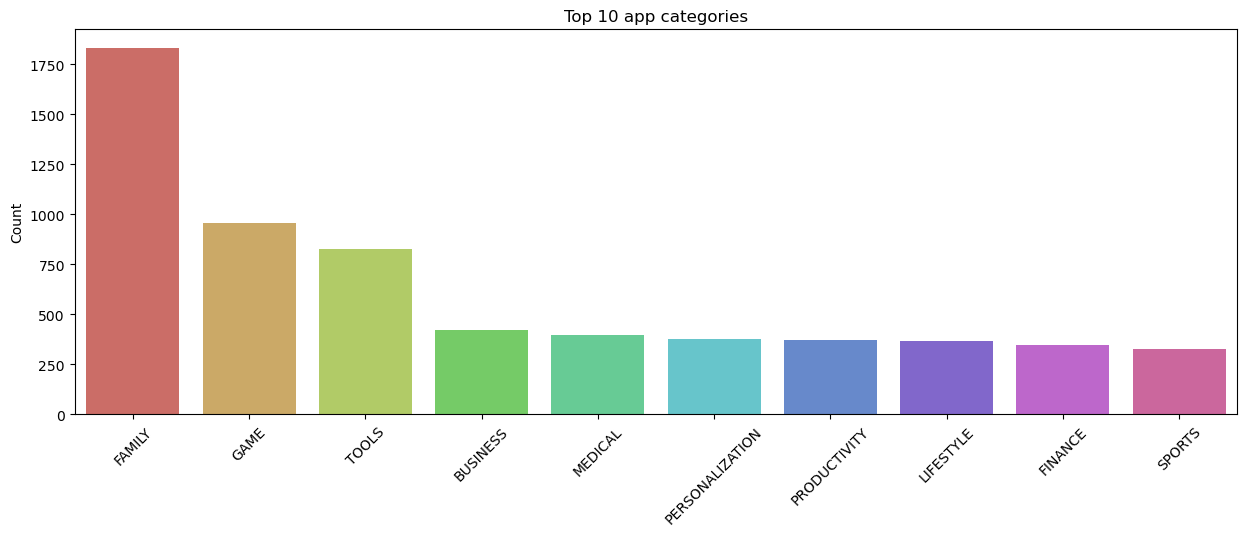

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(x=category.index[:10],y='Count',data=category[:10],palette='hls')
plt.title('Top 10 app categories')
plt.xticks(rotation=45)
plt.show()

1. Which Category has largest number of installation?
2. What are the top 5 most installed Apps in Each Popular categories?
3. How many apps are there on Google Play Store which got 5 Ratings?

In [70]:
#1. Which Category has largest number of installation?
df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)

Category
GAME             13878924415
COMMUNICATION    11038276251
TOOLS             8001771915
PRODUCTIVITY      5793091369
SOCIAL            5487867902
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

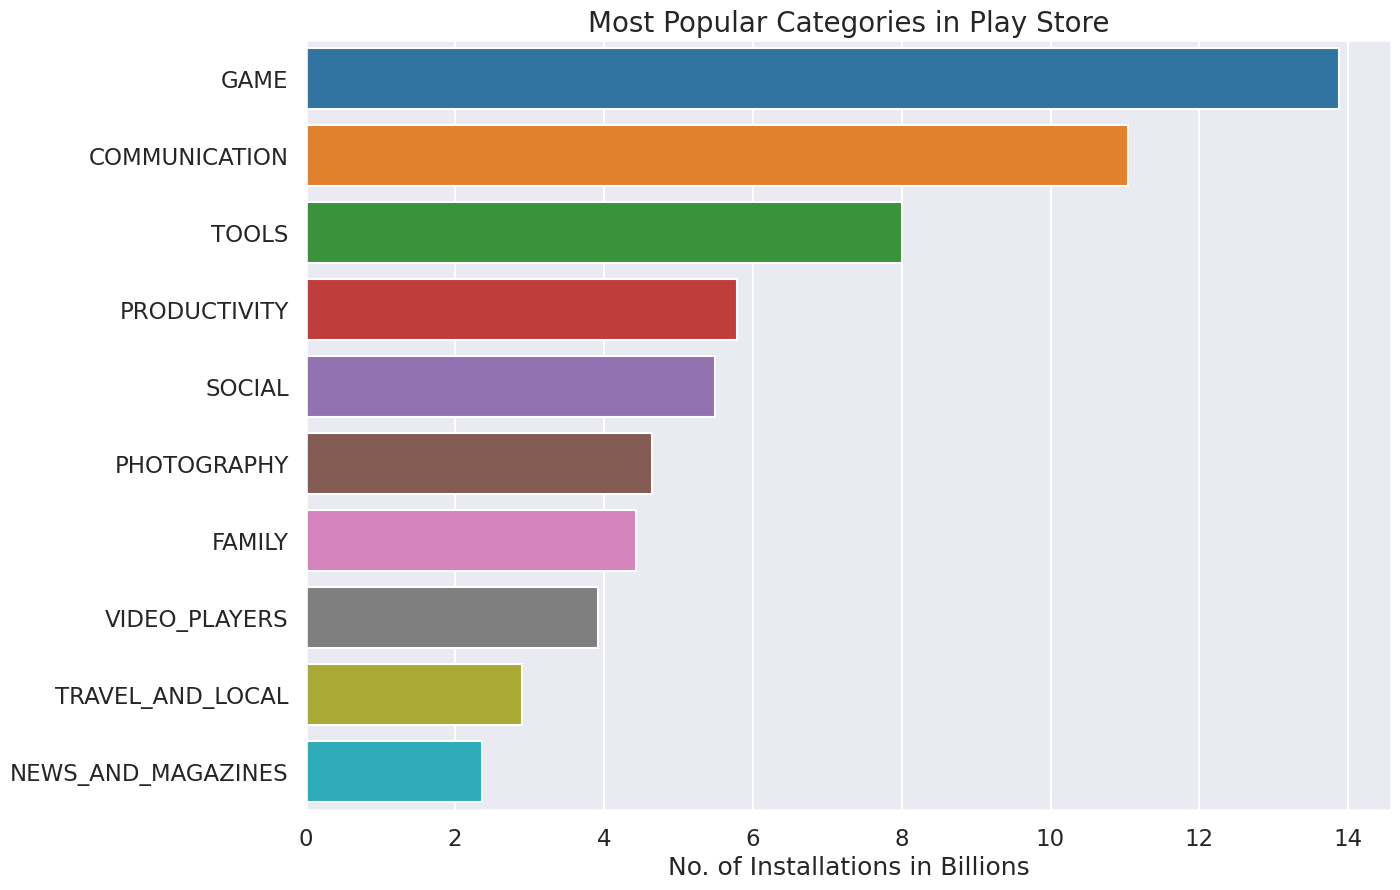

In [76]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

In [71]:
#2. What are the top 5 most installed Apps in Each Popular categories?
df_copy.groupby('App')['Installs'].sum().sort_values(ascending=False).head(5)

App
Google Photos    1000000000
Google+          1000000000
Google Drive     1000000000
Gmail            1000000000
Google News      1000000000
Name: Installs, dtype: int64

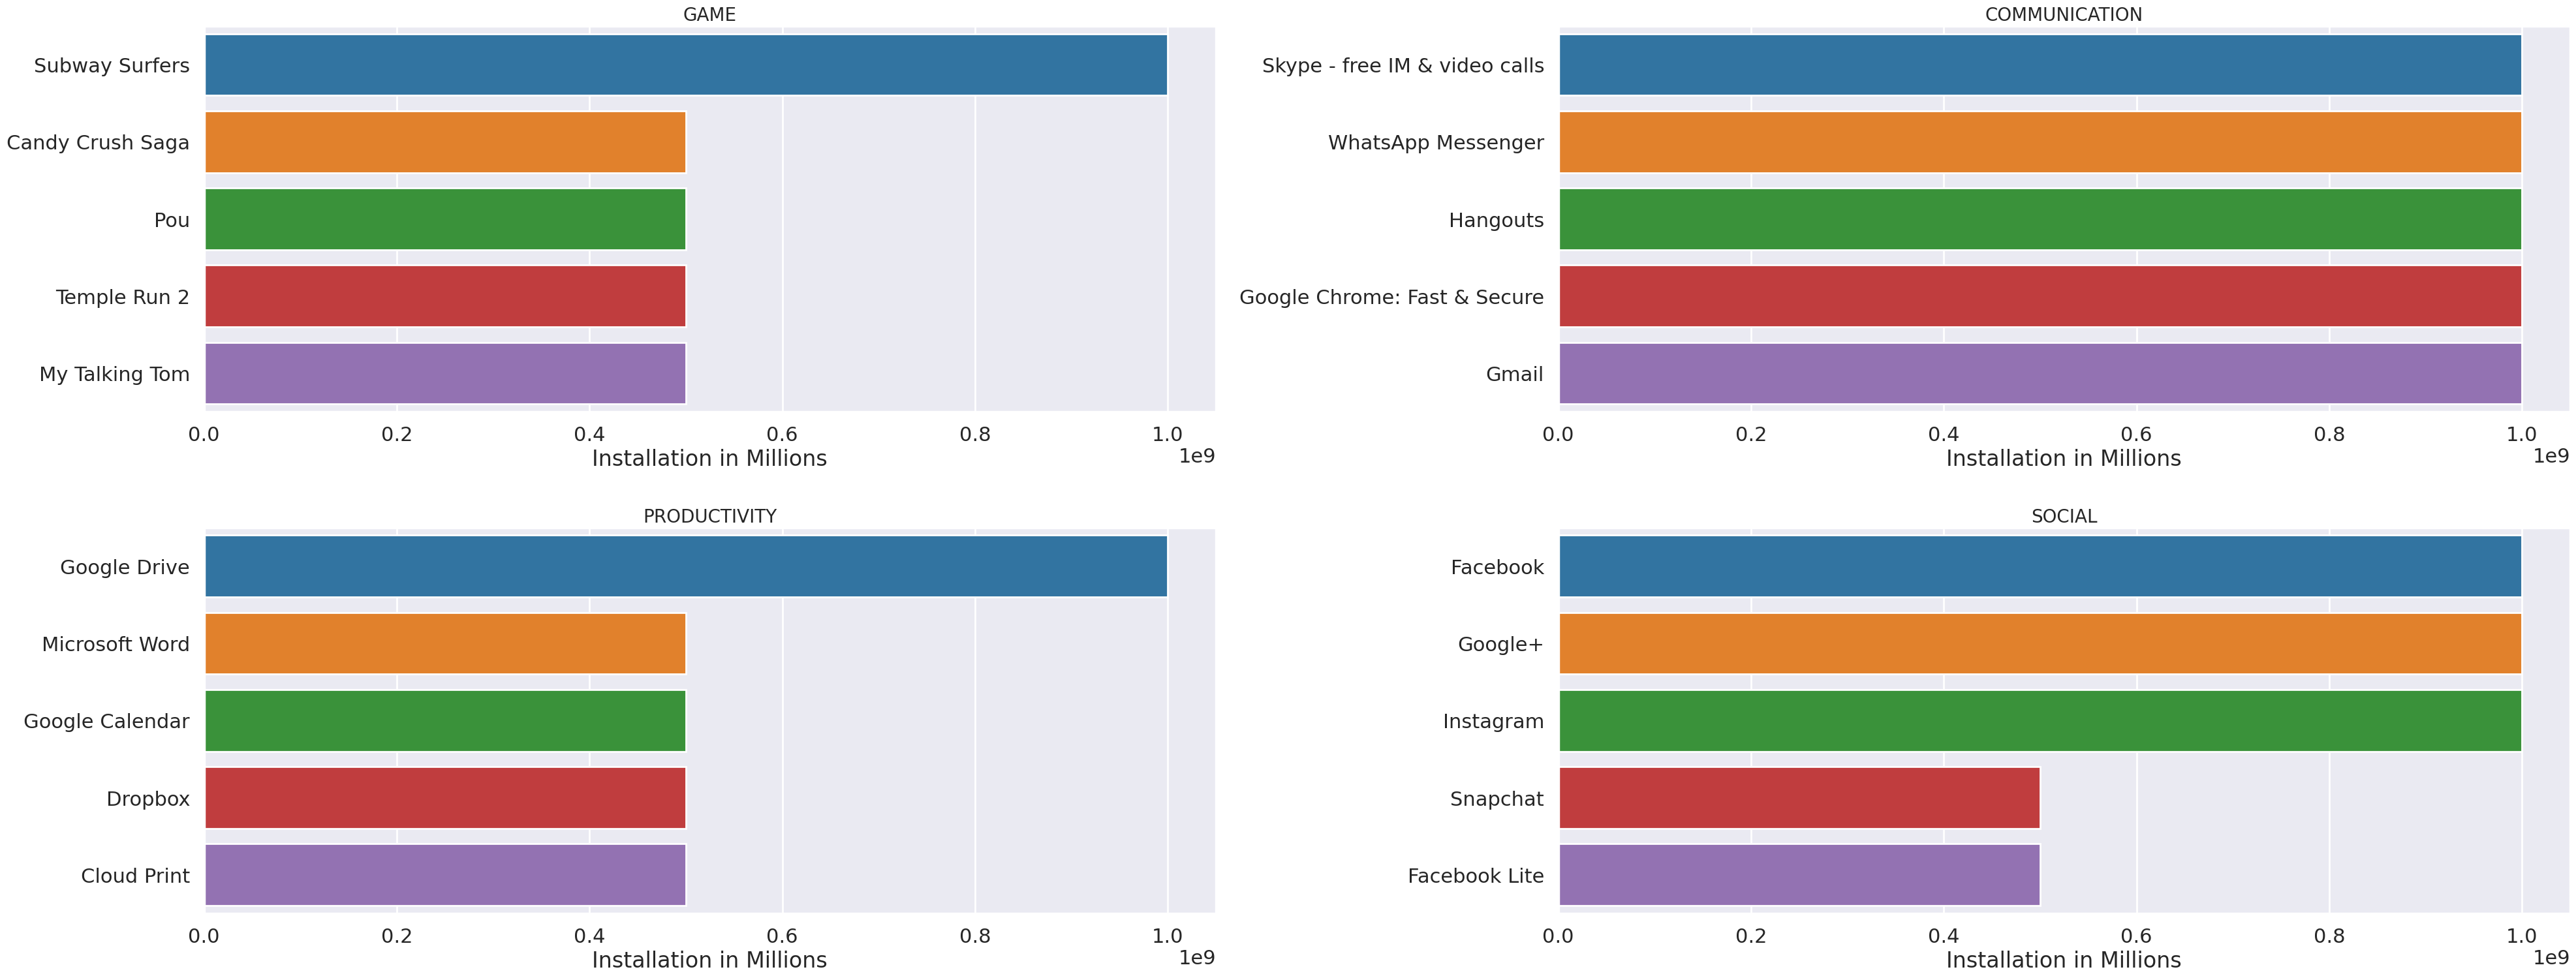

In [77]:
dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [75]:
#3. How many apps are there on Google Play Store which got 5 Ratings?
df_copy[df_copy.Rating == 5].shape[0]

271

In [78]:
rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


Category  Installs                          App  Rating
0   FAMILY      1000  CS & IT Interview Questions     5.0